- If you don't have dataset, you can simply create your own.
- Here is the link of the artical which will guide you to prepare your own dataset
- Link - https://towardsdatascience.com/how-to-build-your-own-dataset-of-youtube-comments-39a1e57aade

- Here I have downloaded all the comments from youtube video:
- https://www.youtube.com/watch?v=_Yhyp-_hX2s
- This video is about eminem song

- work flow of the project:
- Goal is to recommand news and video related to this perticular eminem video
- All the data cleaning and EDA required for the text data has been done in section 1
- I have used pywhatkit to search final result on the google.

In [84]:
#install libs
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [85]:
import pywhatkit as kt
import pandas as pd 
import string
import re
import nltk
nltk.download('stopwords')
from nltk import ngrams, FreqDist
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16138\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Create Data Set

In [7]:
#prepare your own dataset
data=[]

with Chrome(executable_path=r'C:\Chrome_driver\chromedriver.exe') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=_Yhyp-_hX2s")

    for item in range(20): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
        data.append(comment.text)

In [8]:
  
df = pd.DataFrame(data, columns=['comment'])
df.head()

,comment
0,CA\nSKIP NAVIGATION\nSIGN IN\n0:00 / 5:23\nEmi...
1,
2,feat. Eminem from the movie 8 MILE\n\nNo copyr...
3,Eminem - Killer (Remix) [Official Audio] ft. J...
4,Music in this video


In [10]:
#save the comment data into pandas dataframe
df.to_csv("youtube_video.csv")

In [86]:
#read the data
df = pd.read_csv("youtube_video.csv")
df.head()

,Unnamed: 0,comment
0,0,CA\nSKIP NAVIGATION\nSIGN IN\n0:00 / 5:23\nEmi...
1,1,NaN
2,2,feat. Eminem from the movie 8 MILE\n\nNo copyr...
3,3,Eminem - Killer (Remix) [Official Audio] ft. J...
4,4,Music in this video


# Data Analysis

- Below class will perform all the data cleaning and reture the most important words from the comment section which will help to recommand user to see news and related videos.

In [87]:
class data_cleaning:
    
    """initialize the dataframe
    use nltk stop words for english language"""
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.data = []
        self.stopwords = nltk.corpus.stopwords.words('english')
    
    """Drop the corrupt or missing data from the 
       comment section"""
    def drop_missing_data(self):
        return self.dataframe.dropna()
    
    """Rest the index values"""
    def reset_index(self):
        return self.dataframe.rest_index()
    
    """Remove the punct: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'"""
    def remove_punct(self):
        for i in range(len(self.dataframe["comment"])):
            try:
                text  = "".join([char for char in self.dataframe['comment'][i] if char not in string.punctuation])
                text = re.sub('[0-9]+', '', text)
                self.dataframe['comment'][i] = text
            except:
                pass
            
        return self.dataframe['comment']
    
    """Get all the unique values from
       the comments"""
    def tokenization(self):
        for i in range(len(self.dataframe["comment"])):
            try:
                text = re.split('\W+', text.lower())
                self.dataframe['comment'][i] = text
            except:
                pass
            
        return self.dataframe['comment']
    
    """Remove all the stop words
       form the comments, i.e: is, the, are, we, .."""
    def remove_stopwords(self):
        for i in range(len(self.dataframe["comment"])):
            try:
                text = [word for word in text if word not in self.stopword]
                self.dataframe['comment'][i] = text
            except:
                pass
            
        return self.dataframe['comment']
    
    """Create different n-grames which will show
       pare of words and how frequently they were
       used in the comment section"""
    def n_grames(self):
        for i in range(len(df_1["comment_nonstop"])):
            line = df_1["comment_nonstop"][i]
            for words in line:
                self.data.append(words)
                
        all_counts = dict()
        for size in 1, 2, 3, 4, 5:
            all_counts[size] = FreqDist(ngrams(data, size))
        
        return all_counts
    
    

    



In [88]:
data_ = data_cleaning(df)
remove_missing_data = data_.drop_missing_data()
#rest_index = data.reset_index()
remove_punc = data_.remove_punct()
tokenization = data_.tokenization()
remove_stopwords = data_.remove_stopwords()
n_grames = data_.n_grames()



<ipython-input-87-b1a920a9c931>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe['comment'][i] = text


In [89]:
#word frequency
n_grames

{1: FreqDist({('ago',): 60, ('song',): 49, ('reply',): 41, ('eminem',): 32, ('views',): 26, ('view',): 25, ('replies',): 24, ('years',): 19, ('one',): 19, ('still',): 16, ...}),
 2: FreqDist({('reply', 'view'): 25, ('view', 'replies'): 24, ('views', 'years'): 15, ('years', 'ago'): 15, ('ago', 'eminem'): 13, ('days', 'ago'): 12, ('week', 'ago'): 9, ('months', 'ago'): 8, ('k', 'reply'): 8, ('music', 'video'): 7, ...}),
 3: FreqDist({('reply', 'view', 'replies'): 24, ('views', 'years', 'ago'): 15, ('years', 'ago', 'eminem'): 9, ('k', 'reply', 'view'): 8, ('eminemmusic', 'views', 'years'): 6, ('b', 'views', 'years'): 5, ('many', 'people', 'come'): 4, ('okay', 'lose', 'people'): 4, ('lose', 'people', 'never'): 4, ('people', 'never', 'lose'): 4, ...}),
 4: FreqDist({('views', 'years', 'ago', 'eminem'): 9, ('k', 'reply', 'view', 'replies'): 8, ('eminemmusic', 'views', 'years', 'ago'): 6, ('b', 'views', 'years', 'ago'): 5, ('okay', 'lose', 'people', 'never'): 4, ('lose', 'people', 'never', 'lo

# Visualize the result

<function matplotlib.pyplot.show(close=None, block=None)>

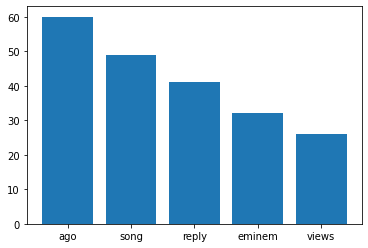

In [90]:
# top 5 words
#1. ago
#2. song
#3. reply
#4. eminem
#5. views

x = ["ago", "song", "reply", "eminem", "views"]
y = [60, 49, 41, 32, 26]
plt.bar(x,y)
plt.show

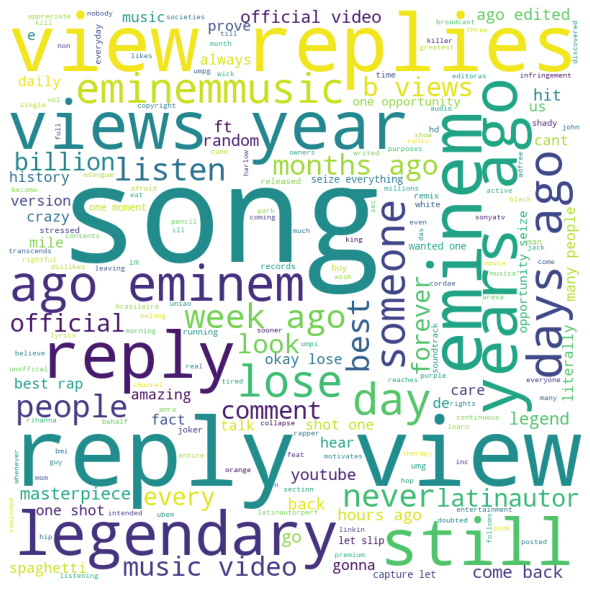

In [91]:
#word cloud
words = " ".join([word for word in data])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Saw videos and news related to this comments of youtube video

In [93]:
#recommand related videos on youtube
#used python library pywhatkit
search = " ".join([word for word in x])
print(search)
kt.search(search)


ago song reply eminem views


In [94]:
#run above code and you will see the results on new window 